In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("./Clustering.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


In [4]:
X = data[["LoanAmount","ApplicantIncome"]]
X

,LoanAmount,ApplicantIncome
0,128,4583
1,66,3000
2,120,2583
3,141,6000
4,95,2333
...,...,...
376,128,5703
377,108,3232
378,71,2900
379,40,4106


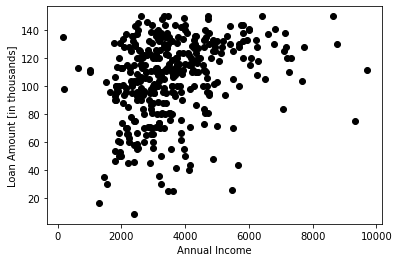

In [5]:
plt.scatter(x=X.ApplicantIncome,y=X.LoanAmount,c='k')
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount [in thousands]")
plt.show()

In [6]:
# 1. CHoosing the value of centroids/no.of clusters
# 2. Randomly initializing the centorids

K = 3
centroids = X.sample(n=K)
centroids

,LoanAmount,ApplicantIncome
105,87,4344
88,129,4200
133,131,3727


     LoanAmount  ApplicantIncome
105          87             4344
88          129             4200
133         131             3727


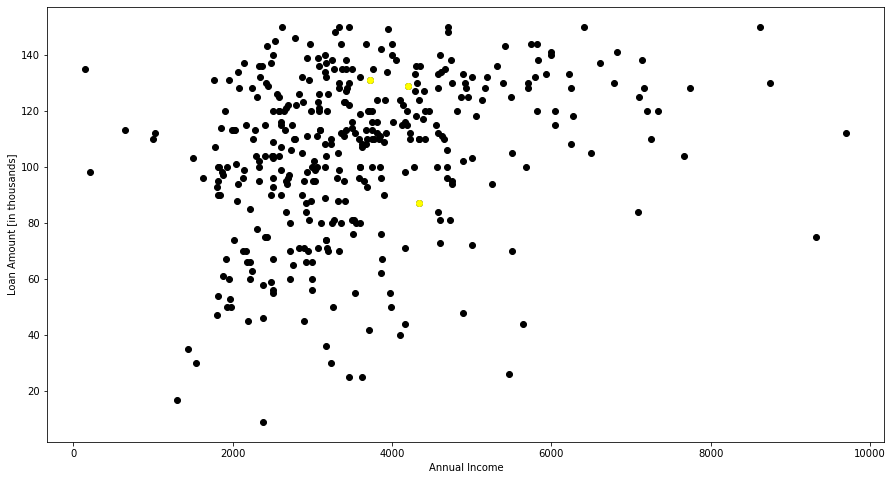

In [7]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(x=X.ApplicantIncome,y=X.LoanAmount,c='k')
ax.scatter(x=centroids.ApplicantIncome,y=centroids.LoanAmount,c='yellow')
ax.set_xlabel("Annual Income")
ax.set_ylabel("Loan Amount [in thousands]");
print(centroids)

In [8]:
# 3. Assign all the data points to the closest cluster centroid
# 4. Recompute centroids of the cluster

In [9]:
diff=1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c['ApplicantIncome']-row_d['ApplicantIncome'])**2
            d2=(row_c['LoanAmount']-row_d['LoanAmount'])**2
            d=np.sqrt(d1+d2) #ED Formula
            ED.append(d)
        X[i]=ED
        i+=1
        
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1]<min_dist:
                min_dist=row[i+1]
                pos=i+1
        C.append(pos)
    X['Cluster']=C
    
    Centroids_new=X.groupby(['Cluster']).mean()[['LoanAmount','ApplicantIncome']]
    
    if j==0:
        diff=1
        j=j+1
            
    else:
        diff=(Centroids_new['LoanAmount']-centroids['LoanAmount']).sum()+(Centroids_new['ApplicantIncome']-centroids['ApplicantIncome']).sum()
        print(diff.sum())
                
    Centroids=X.groupby(['Cluster']).mean()[['LoanAmount','ApplicantIncome']]

<ipython-input-9-9fac7669c12c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-9-9fac7669c12c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster']=C


0.0


In [10]:
X

,LoanAmount,ApplicantIncome,1,2,3,Cluster
0,128,4583,242.491237,383.001305,856.005257,1
1,66,3000,1344.164052,1201.652612,729.899993,3
2,120,2583,1761.309172,1617.025046,1144.052883,3
3,141,6000,1656.880201,1800.040000,2273.021997,1
4,95,2333,2011.015912,1867.309562,1394.464772,3
...,...,...,...,...,...,...
376,128,5703,1359.618329,1503.000333,1976.002277,1
377,108,3232,1112.198274,968.227762,495.534055,3
378,71,2900,1444.088640,1301.293203,829.173685,3
379,40,4106,242.596373,129.448832,389.771728,2


In [11]:
Centroids

,LoanAmount,ApplicantIncome
Cluster,,
1,116.846939,5474.897959
2,103.105263,4114.631579
3,100.719697,2837.890152


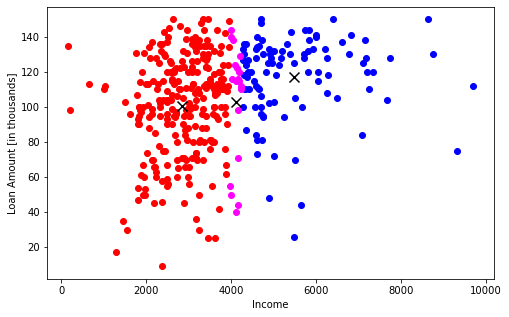

In [12]:
fig,ax=plt.subplots(figsize=(8,5))
color=['blue','magenta','red']
for k in range(K):
    data=X[X['Cluster']==k+1]
    ax.scatter(data['ApplicantIncome'],data['LoanAmount'],c=color[k])
ax.scatter(Centroids['ApplicantIncome'],Centroids['LoanAmount'],c='k',marker='x',s=100)
ax.set_xlabel("Income")
ax.set_ylabel("Loan Amount [in thousands]");


In [13]:
X.Cluster.value_counts()

3    264
1     98
2     19
Name: Cluster, dtype: int64